![SpotifyxRVB](Spotify%20x%20RVB%20-%20Logo.png)

# <a><center> Spotify x Reverberation Radio - The essence of Cool </center></a>
Author: Ulysse Zampogna

The project consists in revealing the secrets of the best radio on earth (according to me): Reverberation. This radio is a collective of artists based in Austin texas, regularly featuring guests apperarences from all over the world. The radio releases one show on a weekly basis. The music selection is excquisit and covers an eclectic range of music history. 

But what make this radio so special? Let's compare it with a few popular playlists on Spotify and try to define the Reverberation's essence of Cool. 

This kernel is broken down in 3 sections. Part 1 uses the Spotipy API to collect data from a dozen of playlists. Part 2 performs an exploratory data analysis to unveal some of the secrets of each playlist. Part 3 is a series of classifiers which takes any track and predict if a given track could enter the exquisit Reverberation playlist.

#### Useful Resources
- https://spotipy.readthedocs.io/en/2.19.0/

In [2]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
from sklearn.preprocessing import MinMaxScaler


pd.set_option('display.max_rows', None)
%matplotlib inline
sns.set(style="ticks", context="poster")
plt.style.use("seaborn-poster")
%autosave 30

Autosaving every 30 seconds


In [3]:
# Initiating color mapping to ensure consistency across all further visualizations

#https://matplotlib.org/stable/gallery/color/named_colors.html
pl_mapping = {
 "Today's Top Hits":'tab:blue',
 'Your Favorite CoffeeHouse':'tab:orange',
 'RapCaviar':'tab:green',
 'Viva Latino':'gold',
 'Hot Country':'tab:purple',
 'New Music Friday':'tab:brown',
 'Peaceful Piano':'tab:pink',
 'Are & Be':'tab:gray',
 'Mint':'tab:olive',
 'Just Hits':'tab:cyan',
 'Soft Pop Hits':'lime',
 'All Out 2000s':'royalblue',
 'Reverberation':'crimson'
}

---
# <a> Exploratory Data Analysis </a>

Objective: Explore each tracklist uniqueness to unveal the specifities of Reverbation selection.

### Table of content

   1. Basic exploration
   2. Explore categorial variables
   3. Explore continuous variables
   4. Track features extractions
   5. Data export
   6. Final checks
   
 ---

### Basic exploration

In [4]:
df = pd.read_csv('./data/rvb_data.csv', sep=',')
df.head()

,playlist,id,name,album,artist,genres,release_date,popularity,acousticness,danceability,...,valence,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,duration_ms,mode,type
0,Today's Top Hits,3USxtqRwSYz57Ewm6wWRMp,Heat Waves,Dreamland,Glass Animals,"['gauze pop', 'indietronica', 'shiver pop']",2020-08-07,90,0.4400,0.761,...,0.531,0.000007,0.0921,-6.900,0.0944,80.870,4,238805,1,audio_features
1,Today's Top Hits,5HCyWlXZPP0y6Gqq8TgA20,STAY (with Justin Bieber),STAY (with Justin Bieber),The Kid LAROI,['australian hip hop'],2021-07-09,97,0.0383,0.591,...,0.478,0.000000,0.1030,-5.484,0.0483,169.928,4,141805,1,audio_features
2,Today's Top Hits,6zSpb8dQRaw0M1dK8PBwQz,Cold Heart - PNAU Remix,Cold Heart (PNAU Remix),Elton John,"['glam rock', 'mellow gold', 'piano rock']",2021-08-13,96,0.0340,0.796,...,0.942,0.000042,0.0952,-6.312,0.0317,116.032,4,202735,1,audio_features
3,Today's Top Hits,0gplL1WMoJ6iYaPgMCL0gX,Easy On Me,Easy On Me,Adele,"['british soul', 'pop', 'pop soul', 'uk pop']",2021-10-14,97,0.5780,0.604,...,0.130,0.000000,0.1330,-7.519,0.0282,141.981,4,224694,1,audio_features
4,Today's Top Hits,4fouWK6XVHhzl78KzQ1UjL,abcdefu,abcdefu,GAYLE,['modern alternative pop'],2021-08-13,100,0.2990,0.695,...,0.415,0.000000,0.3670,-5.692,0.0493,121.932,4,168601,1,audio_features


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2566 entries, 0 to 2565
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   playlist          2566 non-null   object 
 1   id                2566 non-null   object 
 2   name              2566 non-null   object 
 3   album             2566 non-null   object 
 4   artist            2566 non-null   object 
 5   genres            2566 non-null   object 
 6   release_date      2566 non-null   object 
 7   popularity        2566 non-null   int64  
 8   acousticness      2566 non-null   float64
 9   danceability      2566 non-null   float64
 10  energy            2566 non-null   float64
 11  valence           2566 non-null   float64
 12  instrumentalness  2566 non-null   float64
 13  liveness          2566 non-null   float64
 14  loudness          2566 non-null   float64
 15  speechiness       2566 non-null   float64
 16  tempo             2566 non-null   float64


In [6]:
df.describe()

,popularity,acousticness,danceability,energy,valence,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,duration_ms,mode
count,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2.566000e+03,2566.000000
mean,35.966485,0.354210,0.591546,0.572594,0.564617,0.163899,0.172320,-9.366980,0.063381,117.847059,3.932970,2.210312e+05,0.666407
std,30.433958,0.316184,0.154805,0.207488,0.243185,0.295256,0.138233,4.225036,0.063251,27.450135,0.339975,7.849813e+04,0.471588
min,0.000000,0.000009,0.086000,0.006810,0.000010,0.000000,0.023400,-33.522000,0.022700,46.591000,1.000000,3.999600e+04,0.000000
25%,6.000000,0.056625,0.484250,0.425000,0.379250,0.000002,0.093400,-11.794750,0.032400,96.858500,4.000000,1.729962e+05,0.000000
50%,32.000000,0.256000,0.602000,0.586000,0.572000,0.000842,0.118000,-8.598500,0.040600,116.702500,4.000000,2.039395e+05,1.000000
75%,62.000000,0.624000,0.704000,0.734000,0.768000,0.160750,0.198000,-6.189500,0.061075,134.014000,4.000000,2.483942e+05,1.000000
max,100.000000,0.995000,0.975000,0.994000,0.986000,0.977000,0.977000,-1.538000,0.659000,206.122000,5.000000,1.000688e+06,1.000000


##### Group variables in Categorical and Continuous:

In [7]:
categorical = df.select_dtypes(include=['object']).columns.tolist()

print('Number of Categorical variables: {} '.format(len(categorical)))
print(categorical)

print('\n')

continuous = df.select_dtypes(exclude=['object']).columns.tolist()

print('Number of Continuous variables: {}'.format(len(continuous)))
print(continuous)

Number of Categorical variables: 8 
['playlist', 'id', 'name', 'album', 'artist', 'genres', 'release_date', 'type']


Number of Continuous variables: 13
['popularity', 'acousticness', 'danceability', 'energy', 'valence', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature', 'duration_ms', 'mode']


---
# Explore - Categorical Variables

  * Create decades range with release_date
  * Extract meaningfull genres

In [8]:
cat_var = ['playlist', 'id', 'name', 'album', 'artist', 'genres', 'release_date', 'type']

### Explore tracks release_dates

In [9]:
df.groupby('playlist')['release_date'].agg({min,max})

,max,min
playlist,,
All Out 2000s,2018-03-02,1999
Are & Be,2022-01-14,2020-12-04
Hot Country,2022-01-14,2019-09-27
Just Hits,2022-01-21,2017-06-23
Mint,2022-01-21,2021-03-24
New Music Friday,2022-01-21,2022-01-16
Peaceful Piano,2022-01-20,2014-11-28
RapCaviar,2022-01-21,2020-12-25
Reverberation,2021-03-07,1956-10-19


#### Group release_dates into decades

In [10]:
# Release_date is treated as an object type. Let's transform it ot datetime.
df['release_date'] = pd.to_datetime(df.release_date)
#df.info()

# Extract Year from release_date
df['year'] = df.release_date.dt.year
df['release_decade'] = df.year.apply(lambda row: str(row)[:2]+str(row)[2]+'0s')

# Check if new column has been created
#df.columns

#### Vizualize the distribution of tracks across decades for each playlist

In [11]:
decade_agg = df.groupby(['playlist','release_decade']).agg({'id':'size'})
# the output of a groupby is a multi index series
# Caclulate the percentage of total, group by the previously obtained series at the lowest level
# apply lambda to divide each lowest level by its group sum
decade_agg = decade_agg.groupby(level=0).apply(lambda x: round(100 * x / x.sum(),1)).reset_index()
decade_agg.rename(columns={'id':'Percentage of Total'},inplace=True)
decade_pivot = decade_agg.pivot(index='playlist',columns='release_decade',values="Percentage of Total").fillna(0)

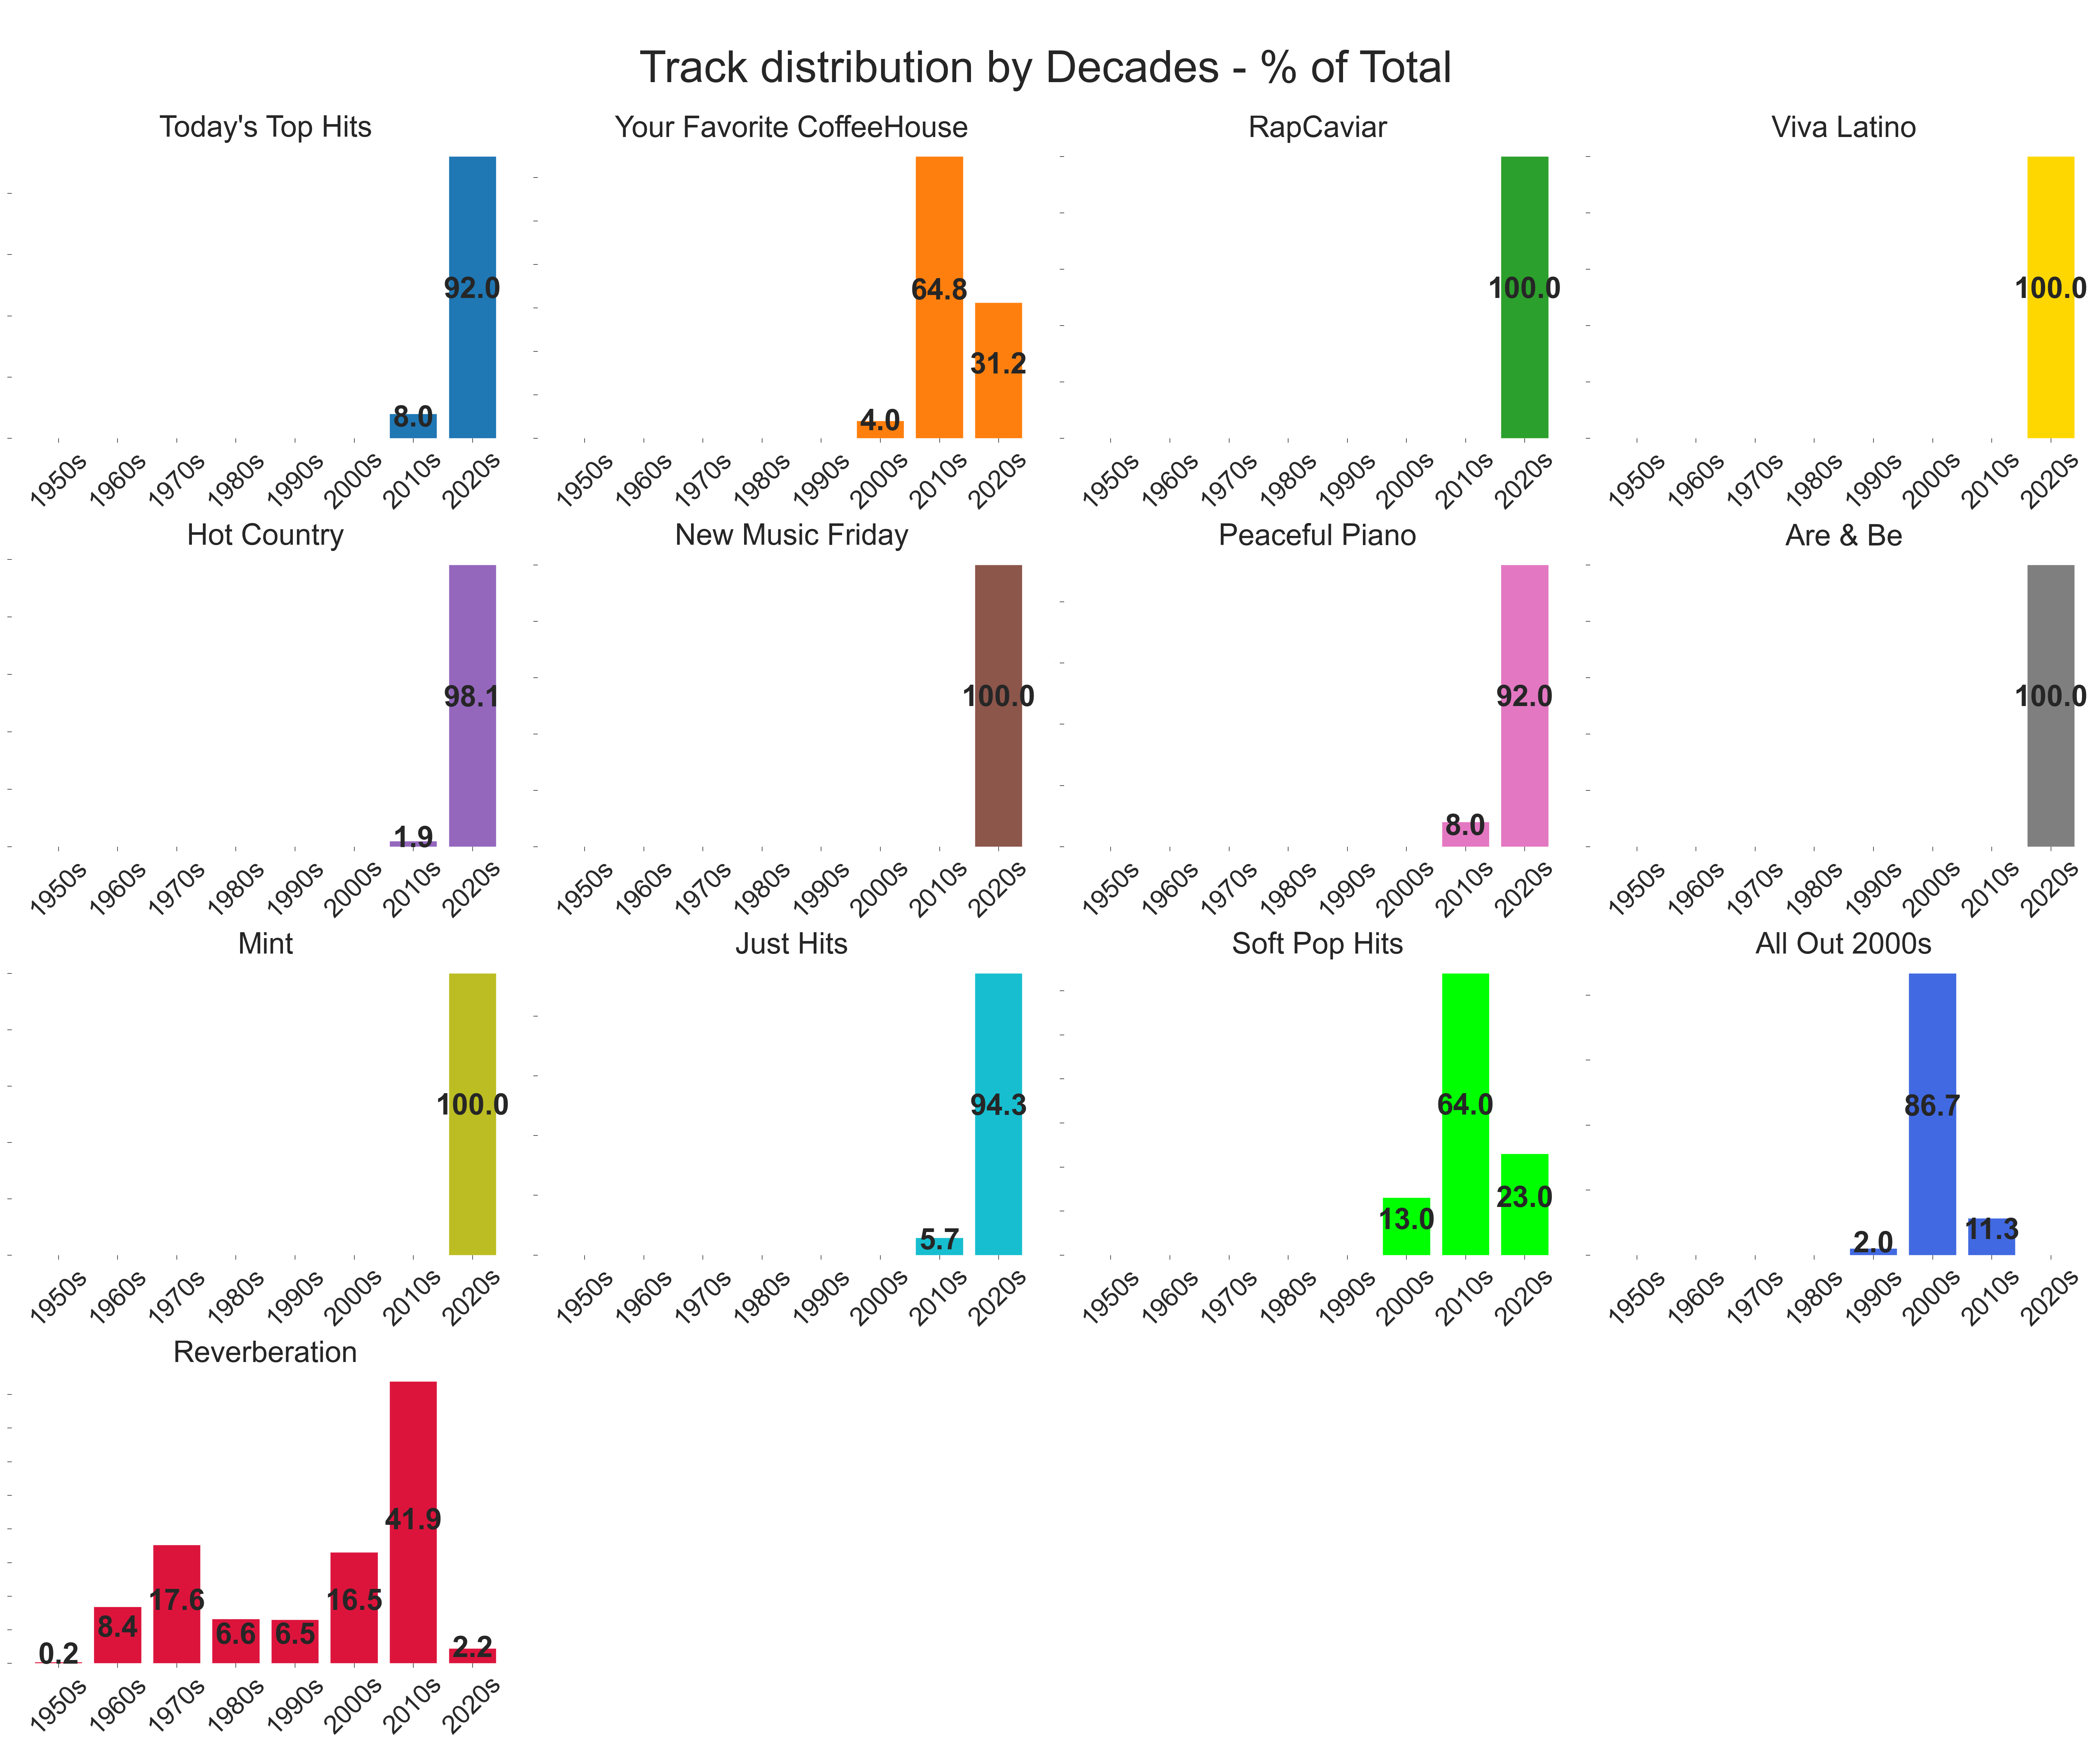

In [12]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        if y[i] > 0:
            plt.text(i,y[i]//2,y[i], ha='center', fontsize=80, fontweight='bold')# fontdict={'font.size': 80,'font.weight':'bold'})

# List of unique playlist
pls = df['playlist'].unique().tolist()

# Build bar charts
fig=plt.figure(figsize=(80,80))

for index_subplot,pl in enumerate(pls,1):
    # setting up variables
    tmp = decade_pivot.loc[pl]
    x = tmp.index
    y = tmp.values
    
    # adding subplot
    ax = fig.add_subplot(5,4,index_subplot)
    plt.tight_layout()
    plt.bar(x,y,color=pl_mapping[pl])
    #sns.barplot(x=tmp.index,y=tmp.values,data=tmp)
    
    # set axis & legend
    fig.suptitle('\n Track distribution by Decades - % of Total \n', fontsize=120)

    ax.set_title(tmp.name)
    ax.title.set_size(80)
    
    plt.xticks(size=70)
    plt.xticks(rotation=45)
    plt.yticks(size=0)
    
    # remove frame
    for edge in ['top','right','bottom','left']:
        ax.spines[edge].set_visible(False)
    
    # add Percentage of Total on each bar
    addlabels(x,y)
    #plt.rcParams.update({'font.size': 80,'font.weight':'bold'})

#plt.savefig('SxR_Track_Distribution_by_Decades.png', format='png', orientation='landscape')
plt.show()

#### Notes:
   
   * As a reminder, 12 playlists were selected among the most popular playlists on Spotify for 2021. They will serve as benchmark against our target playlist: Reveberation Radio.
   * At the first glance, it's clear that most playlists are very specialized. They cover between 1 to 3 decades at most.
   * In contrary, Reverberation proposes a selection spanning 8 decades. It demonstrates the ecclectism which makes this radio so enjoyable to me. 
   * It's also quite interesting to notice that 42% of Reverberation tracks were released in 2010s. Meaning, the selection blends recent releases, which consistutes its basis, with connections to somehow distant past. This particularility is a trait I enjoy very much. Connecting the unconnected.
   
#### Side Note:
   * Additionnally, the decades field will be a valuable predicator in Part 3 to classify a new track in one of the playlist.

---
## Explore Genres

The field Genre collected via Spotipy consists of a python list containing multiple genres for each track. This data structure create an opportunity and a challenge.

The opportunity is having access to detailed sub genres. However, the cardinality of this field consistutes a challenge when analyzing many tracks with each many genres. Essentially, making it difficult to exploit in an analytical and classification model framework. 

Hence, we need to process further the data for our needs. We'll first extract the first genre per track and store it in a new column called "Style". Then we will extract major styles from this unique string.

In [13]:
df['style'] = df.genres.apply(lambda row: row.split(',')[0] if ',' in row else row)\
                .replace("[\(['{}')\]]", '',regex=True)
print(f"After selecting only the first genres, we succeeded to reduce the cardinality of style to:\
      \n {len(df['style'].unique())}")

After selecting only the first genres, we succeeded to reduce the cardinality of style to:      
 497


In [14]:
print(f"NB: \nGenres contains empty lists: {len(df[(df.playlist=='Reverberation') & (df['genres']=='[]')])}")
print(f"These rows become NaN in the style field: {len(df[(df.playlist=='Reverberation') & (df['style']=='')])}")

NB: 
Genres contains empty lists: 394
These rows become NaN in the style field: 394


##### Get the Top 5 genres per playlist

In [15]:
style_agg = df.groupby(by=['playlist','style']).size().reset_index(name='Count')\
            .sort_values(['playlist','Count'],ascending=False)
filter_top5 = list(style_agg.groupby(by=['playlist']).Count.nlargest(5).index.get_level_values(1))
style_agg.filter(items=filter_top5, axis=0)

,playlist,style,Count
20,All Out 2000s,dance pop,74
7,All Out 2000s,barbadian pop,10
6,All Out 2000s,atl hip hop,5
12,All Out 2000s,british soul,5
13,All Out 2000s,bubblegum dance,5
36,Are & Be,alternative r&b,15
40,Are & Be,dance pop,7
44,Are & Be,pop,7
33,Are & Be,,3
38,Are & Be,canadian contemporary r&b,3


#### Impute Mode for NaN values

In [16]:
# Retrieve Mode by playlist
filter_mode = list(style_agg[style_agg['style']!= ''].groupby('playlist').Count.nlargest(1).index.get_level_values(1))
mode_per_playlist = style_agg.filter(items=filter_mode,axis=0).values.tolist()

# Impute Mode to NaN values in original df
def impute_mode(cols):
    for mode in mode_per_playlist:
        if mode[0] == cols['playlist'] and cols['style'] == "":
            return mode[1]
    return cols['style']

style_agg['style'] = style_agg.apply(lambda cols: impute_mode(cols),axis=1)

In [17]:
#(style_agg.apply(lambda col: 
#                [mode[1] for mode in mode_per_playlist 
#                 if (
#                     mode[0]==col['playlist'] 
#                     and 
#                     col['style'] == "") 
#                ][0]
#                ,axis=1)
#)

In [18]:
style_agg.isna().sum()

playlist    0
style       0
Count       0
dtype: int64

In [60]:
style_agg[style_agg['playlist']=='Viva Latino']

,playlist,style,Count,major_genres
639,Viva Latino,latin,21,latin
632,Viva Latino,argentine hip hop,3,hip hop
635,Viva Latino,colombian pop,3,pop
637,Viva Latino,corrido,2,Others
638,Viva Latino,dance pop,2,pop
643,Viva Latino,puerto rican pop,2,pop
645,Viva Latino,reggaeton,2,Others
647,Viva Latino,trap argentino,2,rap
648,Viva Latino,trap boricua,2,rap
631,Viva Latino,latin,1,latin


#### Reduce further the cardinality

In [61]:
# 15 selected major genres from the Top 5 genres per playlist
major_genres = ['latin','hip hop','rock','soul','r&b'\
              ,'edm','rap','folk','indie','country'\
              ,'americana','house','alt z','pop','bossa nova','reggaeton']

In [62]:
def major_mapping(row):
    for major in major_genres:
        if major in row:
            return major
    return 'Others'

style_agg['major_genres'] = style_agg['style'].apply(lambda row: major_mapping(row))

In [63]:
style_agg.tail()

,playlist,style,Count,major_genres
26,All Out 2000s,lilith,1,Others
27,All Out 2000s,modern rock,1,rock
28,All Out 2000s,neo mellow,1,Others
29,All Out 2000s,neo soul,1,soul
32,All Out 2000s,pop rock,1,rock


In [103]:
major_genres_agg = (major_genres_agg.groupby(['playlist','major_genres'])
                 .agg({'Count':'sum'})[['Count']]
                 .groupby(level=0)
                 .apply(lambda x: round(100*x/x.sum(),1))
                 .sort_values(by=['playlist','Count'],ascending=False)
                 .rename(columns={'Count':'% of Total'})
                 .reset_index()
)

In [104]:
major_genres_agg.head()

,playlist,major_genres,% of Total
0,Your Favorite CoffeeHouse,indie,25.0
1,Your Favorite CoffeeHouse,folk,20.8
2,Your Favorite CoffeeHouse,Others,16.7
3,Your Favorite CoffeeHouse,americana,14.6
4,Your Favorite CoffeeHouse,pop,14.6


### Visualize genres distribution per playlist

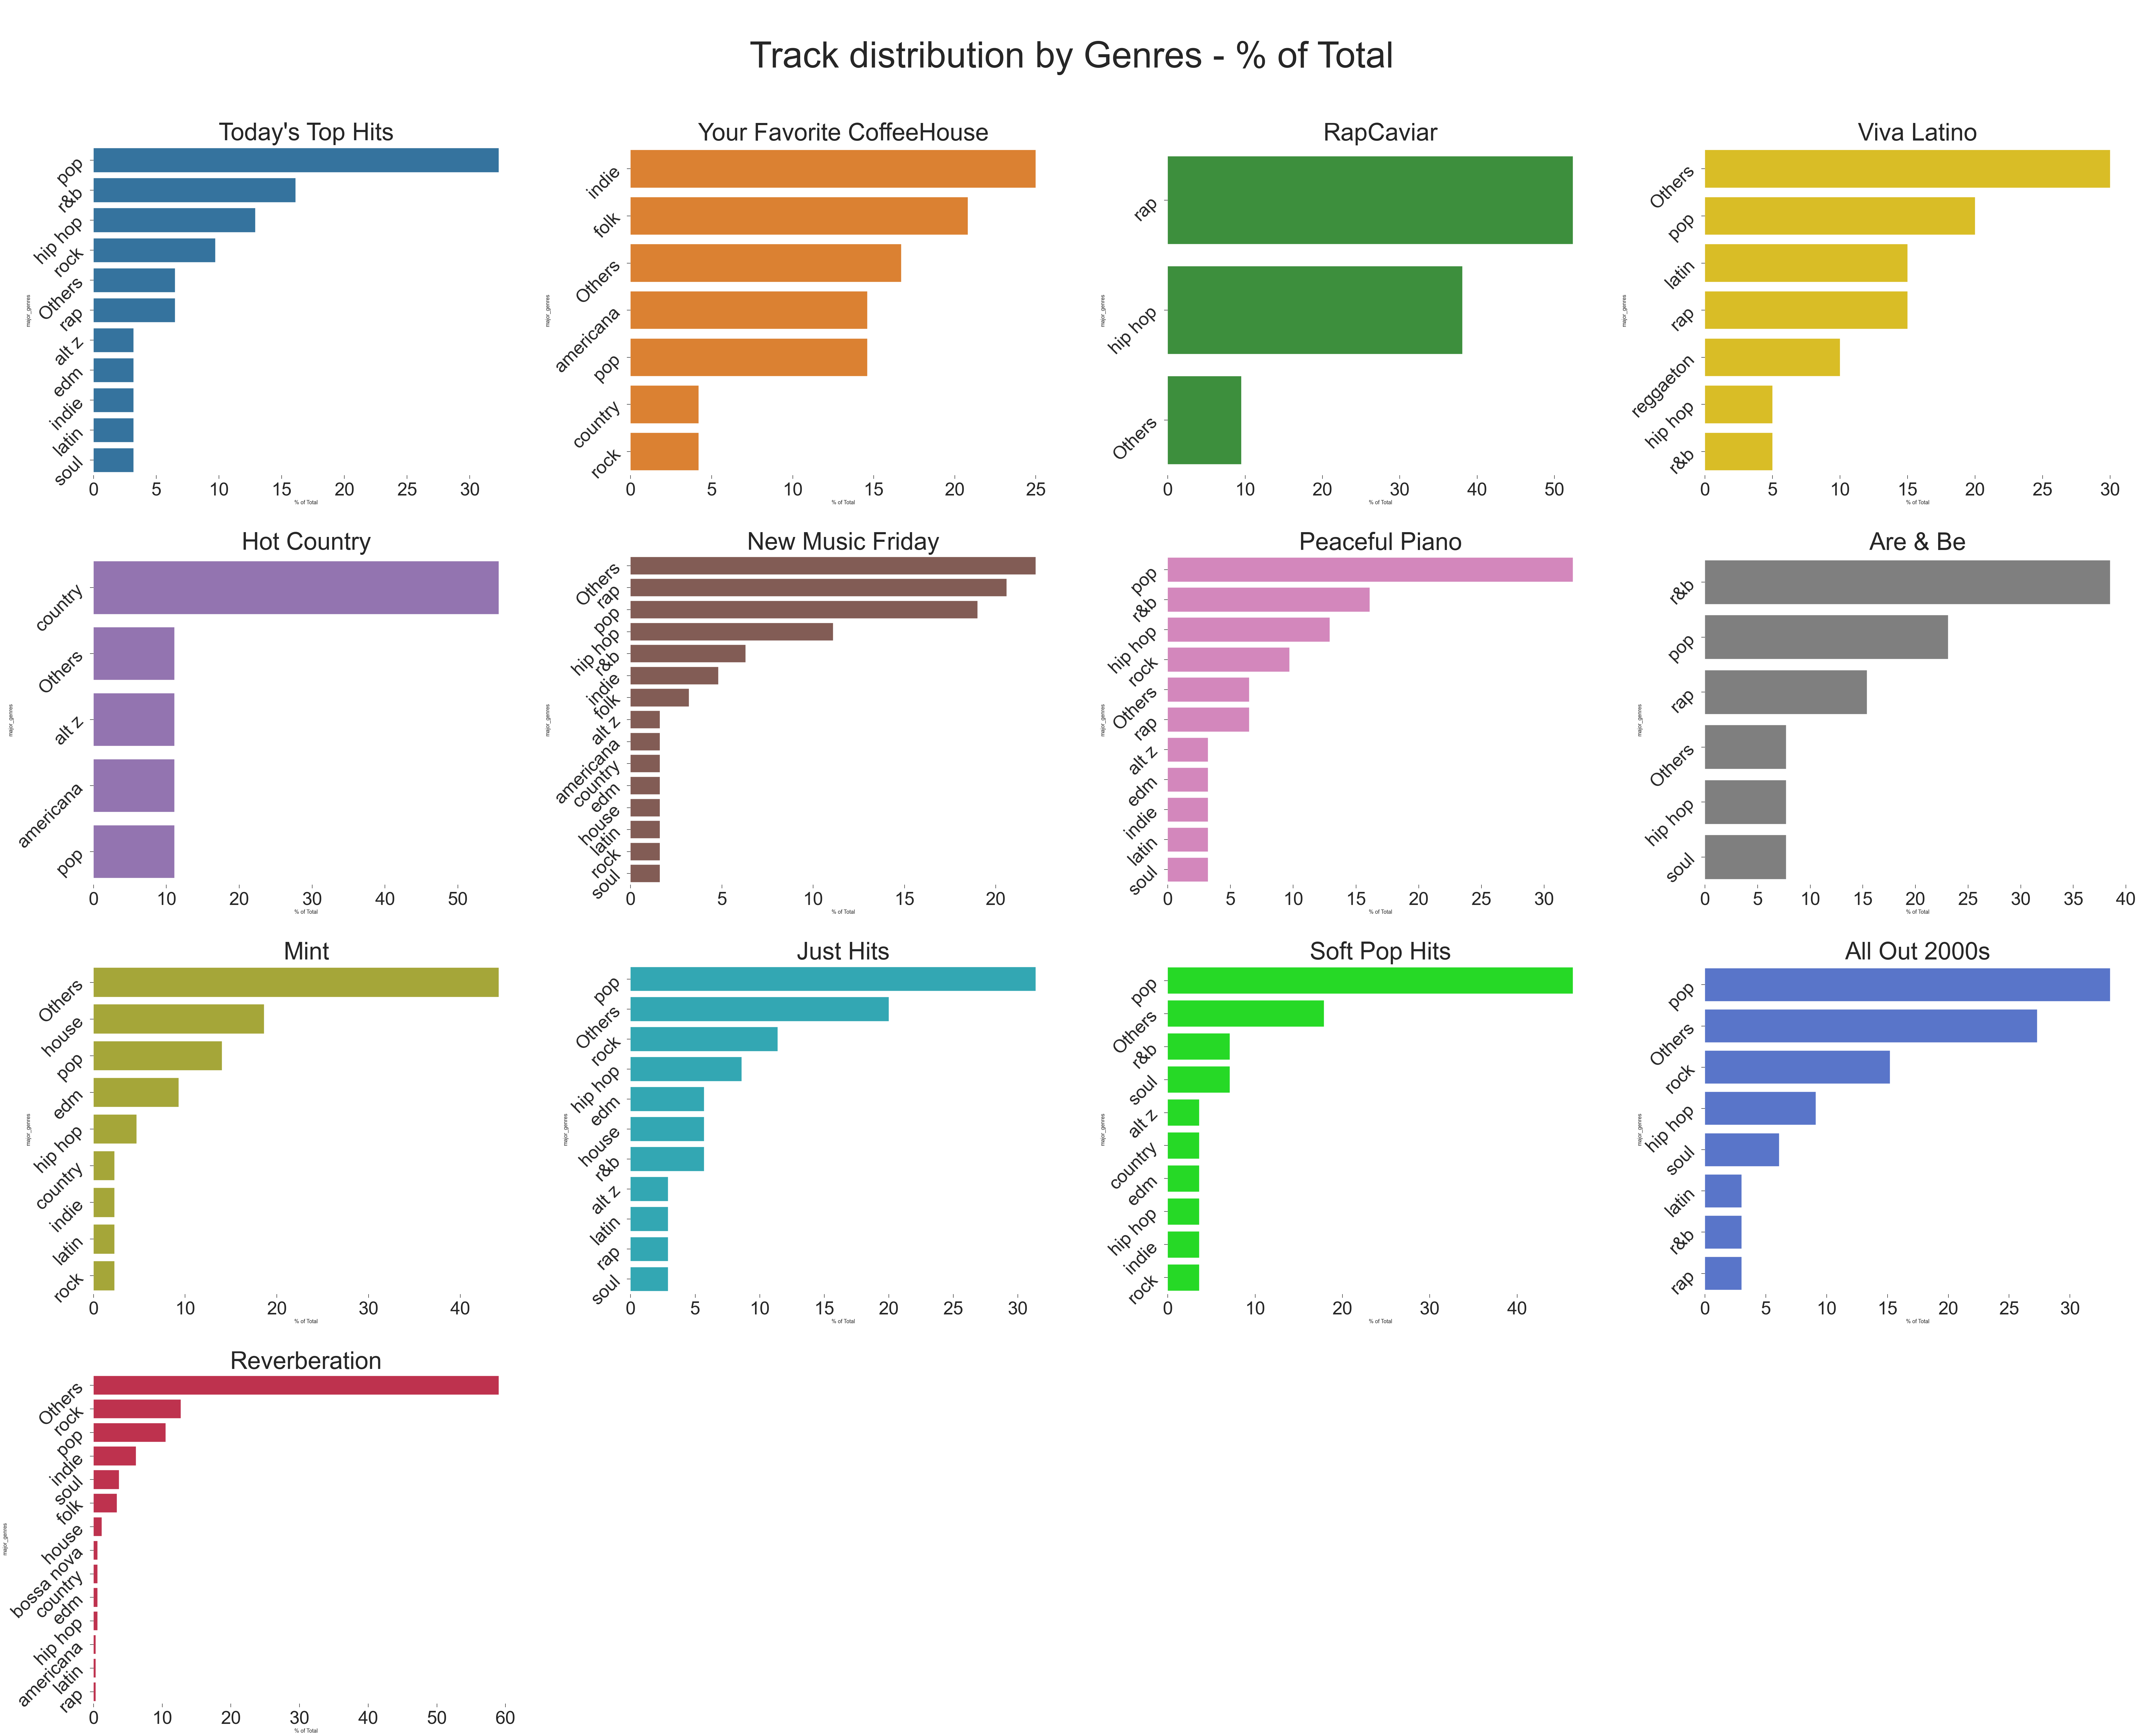

In [119]:

# List of unique playlist
pls = df['playlist'].unique().tolist()

# Build bar charts
fig=plt.figure(figsize=(100,100))

for index_subplot,pl in enumerate(pls,1):
    # setting up variables
    tmp = major_genres_agg[major_genres_agg.playlist==pl]
    x = tmp['major_genres']
    y = tmp['% of Total']
    
    # adding subplot
    ax = fig.add_subplot(5,4,index_subplot)
    plt.tight_layout()
    sns.barplot(x='% of Total',y='major_genres',data=tmp[['major_genres','% of Total']] ,color=pl_mapping[pl],saturation=0.7)
    #sns.barplot(x=tmp.index,y=tmp.values,data=tmp)
    
    # set axis & legend
    fig.suptitle('\n Track distribution by Genres - % of Total \n', fontsize=120)

    ax.set_title(pl)
    ax.title.set_size(80)
    
    plt.xticks(size=60)
    plt.yticks(size=60)
    plt.yticks(rotation=45)
    
    # remove frame
    for edge in ['top','right','bottom','left']:
        ax.spines[edge].set_visible(False)

#plt.savefig('SxR_Track_Distribution_by_Genres.png', format='png', orientation='landscape')
plt.show()

---

## Explore - Continuous Variables

### Radar charts to explore audio features across playlists
#### Normalisation

Most audio feature variables range from 1 to 0. For the others, we'll use a scaling technique to transform their range between 0 to 1. Effectively, normalizing the scale of all audio feature variables for comparison purposes.

In [ ]:
#Selection of variable to normalize
normalization_cols=['speechiness','loudness','tempo','duration_ms']
norm_cols=[col+'_norm' for col in normalization_cols]
#Normalization
df[norm_cols] = MinMaxScaler().fit_transform(df[normalization_cols])
df.columns

In [ ]:
#Snippet to delete unwanted cols during development phase
#to_del = [col for col in df.columns.values if '_norm' in col]
#df.drop(columns=to_del,axis=1,inplace=True)

#### Build radar chart

In [ ]:
labels = np.array(['popularity', 'danceability','energy', 'loudness_norm', 'tempo_norm' , 'valence'
                   , 'instrumentalness','speechiness_norm' , 'acousticness', 'liveness', 'duration_ms_norm'])
pls = df['playlist'].unique().tolist()

#Create figure
fig=plt.figure(figsize=(100,100))
#Add one subplot with distinct color mapping for each individual playlist
for index_subplot,pl in enumerate(pls,1):

    #Process data for each playlist & create values
    stats = df.loc[df.playlist==pl,labels].mean()
    stats.popularity = stats.popularity/100
    stats = stats.values
    #Create angles for radar
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    #Close the plot
    stats=np.concatenate((stats,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    #Built figure
    ax = fig.add_subplot(5,4,index_subplot, polar=True)
    plt.tight_layout()
    #Plot
    ax.plot(angles, stats, 'o-', linewidth=15, color=pl_mapping[pl])
    ax.fill(angles, stats, pl_mapping[pl], alpha=0.25)
    #Set axis & legend
    fig.suptitle('Radar charts of Audio features \n', fontsize=160)
    ax.set_thetagrids(angles * 180/np.pi)
    plt.xticks(angles[:-1], labels, color='dimgrey', size=50)
    plt.yticks(size=10)
    ax.set_ylim(0,1)
    ax.set_title(df.loc[df.playlist==pl,'playlist'].iloc[0])
    ax.title.set_size(80)
    ax.grid(True)

#EXPORT graph to explore in details
#plt.savefig('SxR_radar_charts.png', format='png', orientation='landscape')
plt.show()

#### Notes:

Technical:
   * See Appendix for details definition of each audio feature above.
   * Radar charts are somehow controversial as the variable orders may influence the area shape and the viewers evaluation. However, they are useful to directionally guide us in defining the unique characteristics of each playlist.
   
On Reveberation:
   * Reverberation playlist seems to have a high <b>valence</b> - which measure the "happiness" of a track - with a mean of 0.609 or the 3rd highest. Knowing the playlist, it does make sense as their selection truly generate a sensation of well-being while exploring a broad range of genres.
   * Another characterics of Reverberation is its extremely low <b>Popularity</b> - with a mean of 18 or by far the lowest of the list. Once again, this is not surprising as their trademark is to find hidden gems. Even as a music collector, Reveberation keeps on surprising me every time by fidding extremely satisfying but rare, or unknown, tracks.
   * Finally, Reveberation is one of the playlist with the highest average <b>acousticness</b> and <b>instrumentalness</b>. Its main audience is most probably directed to listeners with a more advanced musical knowledge. Often it translates with songs which focuses on elaborated sonic environment. 

#### Compute Centrality (Mean) of each audio feature per playlist.

In [ ]:
#Resource to set precision: https://www.codegrepper.com/code-examples/python/pandas+format+float+decimal+places
pd.set_option('precision', 3)
df_playlist_agg = df.groupby('playlist')[labels].mean()
df_playlist_agg

---
### Pairplot for continuous variables
Resources: https://seaborn.pydata.org/generated/seaborn.pairplot.html

Pairplot helps discovering the relationships in continuous variables by creating a scatter plot for each pair as well as plotting the distribution for each variable.

By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.

#### Pairplot for all playlists

In [65]:
#plt.figure(figsize=(24,8))
sns.pairplot(df[cols],corner=True,hue='playlist',palette=pl_mapping)
#To explore the pairplot in detail, check the saved png file below:
plt.savefig('SxR_pairplot.png', format='png', orientation='landscape')
plt.show()

NameError: name 'cols' is not defined

#### Notes:

   * The Reveberbaration playlist accounts for 60+% of all tracks in the dataset. Thus, it's preferable to visualize it separately. It also means that we may have imbalanced classes for classification models. We will develop this point later on.
   * Popularity seems to differentiate Reverberation from other playlists.
   * It's worth noting the positive linear correlation between Loudness and Energy. Othewise, there doesn't seem to have many strong linear correlation among other variables.

#### Pairplot for Reveberation only

In [ ]:
#plt.figure(figsize=(24,8))
sns.pairplot(df[df['playlist']=='Reverberation'][cols],corner=True,hue='playlist',palette=pl_mapping)
#To explore the pairplot in detail, check the saved png file below:
plt.savefig('SxR_pairplot_Reverberation.png', format='png', orientation='landscape')
plt.show()

#### Pairplot for all playlists except Reverberation

In [ ]:
#plt.figure(figsize=(24,8))
sns.pairplot(df[df['playlist']!='Reverberation'][cols],corner=True,hue='playlist',palette=pl_mapping)
#To explore the pairplot in detail, check the saved png file below:
plt.savefig('SxR_pairplot_excl_R.png', format='png', orientation='landscape')
plt.show()

#### Notes:

   * The diagonal represents the univariate distribution. We can already notice differences between playlists with centrality peaks located at different values. For example, peaks in Popularity, Acousticness or Energy vary across playlists.
   * It seems that Instrumentalness coupled with various other variables would a good indicator to differentiate playlists from one another as it naturally creates clusters.

##### Create a Violin Plot

   * Violin plot are useful to vizualise the interquantlie range, extreme values, mean and the distribution, all at once.

In [ ]:
violin_metrics=['popularity','valence','energy','duration_ms_norm','instrumentalness']

In [ ]:
agg_labels=labels[:]
agg_labels = np.append(agg_labels,'playlist')
sns.violinplot(x='playlist',y='loudness_norm',data=df[agg_labels],palette=pl_mapping)
plt.xticks(rotation=45)
plt.show()

Rev has longer tail than other playlist. Potentially due to the diversity of songs and simply, the number of songs.

### Appendix

#### Spotify Audio Features definitions:
in order of appearence:

* <b>Popularity</b>: is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past.<br><br>

* <b>Danceability</b>: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.<br><br>

* <b>Energy</b>: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.<br><br>

* <b>Loudness</b>: the overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing the relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.<br><br>

* <b>Tempo</b>: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, the tempo is the speed or pace of a given piece and derives directly from the average beat duration.<br><br>

* <b>Valence</b>: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).<br><br>

* <b>Instrumentalness</b>: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.<br><br>

* <b>Speechiness</b>: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audiobook, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.<br><br>

* <b>Acousticness</b>: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.<br><br>

* <b>Liveness</b>: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides a strong likelihood that the track is live.<br><br>